In [1]:
#201984054 산업데이터 사이언스 학부 이성훈

#데이터 소개 

#Leave	            가입해지여부(1이면 해지)
#MemberWeeks	가입기간
#NewContract	가입갱신여부(1이면 갱신)
#IsData	            데이터요금제사용여부(1이면 사용)
#DataAmount	데이터사용량(GB)
#Callcenter	고객센터전화량
#CalMins      	월평균전화량(분)
#CalCounts	월평균전화수(횟수)
#MonthlyFee	월평균요금
#OverFee	            초과요금
#RoamingMin	로밍시간(분)

In [3]:
import pandas as pd
import numpy as np

In [4]:
#데이터를 불러오겠습니다. 그리고 행과 열의 갯수를 확인하여줍니다.
data= pd.read_csv('telco.csv',encoding='euc-kr')
data.shape
#확인결과 3333개의 열과 11개의 컬럼으로 구성되어 있는것을 확인할 수 있습니다.

(3333, 11)

In [6]:
#간단히 head를 활용해서 표로 보겠습니다.
data= pd.read_csv('telco.csv',encoding='euc-kr')
data.head()

,Leave,MemberWeeks,NewContract,IsData,DataAmount,Callcenter,CalMins,CalCounts,MonthlyFee,OverFee,RoamingMin
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [5]:
#한눈에 자세히 확인하기 
data.describe().T.head(11)

,count,mean,std,min,25%,50%,75%,max
Leave,3333.0,0.144914,0.352067,0.0,0.00,0.00,0.00,1.00
MemberWeeks,3333.0,101.064806,39.822106,1.0,74.00,101.00,127.00,243.00
NewContract,3333.0,0.903090,0.295879,0.0,1.00,1.00,1.00,1.00
IsData,3333.0,0.276628,0.447398,0.0,0.00,0.00,1.00,1.00
DataAmount,3333.0,0.816475,1.272668,0.0,0.00,0.00,1.78,5.40
Callcenter,3333.0,1.562856,1.315491,0.0,1.00,1.00,2.00,9.00
CalMins,3333.0,179.775098,54.467389,0.0,143.70,179.40,216.40,350.80
CalCounts,3333.0,100.435644,20.069084,0.0,87.00,101.00,114.00,165.00
MonthlyFee,3333.0,56.305161,16.426032,14.0,45.00,53.50,66.20,111.30
OverFee,3333.0,10.051488,2.535712,0.0,8.33,10.07,11.77,18.19


In [6]:
#데이터의 타입을 확인하여보니 data froame인것을 확인할 수 있습니다.
data= pd.read_csv('telco.csv',encoding='euc-kr')
type(data)

pandas.core.frame.DataFrame

In [7]:
#컬럼을 확인 해보겠습니다. Seies 함수를 활용하여 순서대로 번호를 붙여 편하게 볼 수 있습니다.
columns =data.columns
pd.Series(columns)
#확인 결과 11개의 컬럼이 있는것을 다시 확인 할 수 있습니다.

0           Leave
1     MemberWeeks
2     NewContract
3          IsData
4      DataAmount
5      Callcenter
6         CalMins
7       CalCounts
8      MonthlyFee
9         OverFee
10     RoamingMin
dtype: object

In [8]:
#index값도 확인 해줍니다.
index = data.index
index

RangeIndex(start=0, stop=3333, step=1)

In [9]:
# 각 컬럼의 데이터 형식을 확인하여 보겠습니다.
data.dtypes
#형식을 확인하니 int64와 float 가 있는것을 확인 할 수 있습니다. 둘다 결측치를 표시 할 수 있습니다.

Leave            int64
MemberWeeks      int64
NewContract      int64
IsData           int64
DataAmount     float64
Callcenter       int64
CalMins        float64
CalCounts        int64
MonthlyFee     float64
OverFee        float64
RoamingMin     float64
dtype: object

In [10]:
#더욱 편하게 보기위해서 세어주겠습니다.
data.dtypes.value_counts()
#int64 가 6개 
#folat64가 5개 

int64      6
float64    5
dtype: int64

In [11]:
#한번에 모아서 편하게 보겠습니다.
data.info()
#확인결과 286.6KB의 용량을 가지며 , 
#첫줄에서 DataFrame임을 알 수 있으며 ,
#두번째줄에서 색인범위를 나타내며 , 3333개의 엔트리를 가지고있으며 ,색인이 0 부터 3332까지 할당 되었습니다.
#11개의 컬럼을 가지고 있습니다. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Leave        3333 non-null   int64  
 1   MemberWeeks  3333 non-null   int64  
 2   NewContract  3333 non-null   int64  
 3   IsData       3333 non-null   int64  
 4   DataAmount   3333 non-null   float64
 5   Callcenter   3333 non-null   int64  
 6   CalMins      3333 non-null   float64
 7   CalCounts    3333 non-null   int64  
 8   MonthlyFee   3333 non-null   float64
 9   OverFee      3333 non-null   float64
 10  RoamingMin   3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [12]:
data.values

array([[  0.  , 128.  ,   1.  , ...,  89.  ,   9.87,  10.  ],
       [  0.  , 107.  ,   1.  , ...,  82.  ,   9.78,  13.7 ],
       [  0.  , 137.  ,   1.  , ...,  52.  ,   6.06,  12.2 ],
       ...,
       [  0.  ,  28.  ,   1.  , ...,  56.  ,  14.44,  14.1 ],
       [  0.  , 184.  ,   0.  , ...,  50.  ,   7.98,   5.  ],
       [  0.  ,  74.  ,   1.  , ..., 100.  ,  13.3 ,  13.7 ]])

In [44]:
#월 평균 전화량이 가장 적은 사람은 얼마나 통화 했을까요 ?
data[['CalMins']].sort_values('CalMins').head(20)
#확인 결과 0분으로 확인되었습니다. 그렇다면 전화량을 사용하지않는 고객은 가입을 유지중 인지 확인해보겠습니다.

,CalMins
1345,0.0
1397,0.0
2736,2.6
2753,7.8
1986,7.9
1052,12.5
2252,17.6
3046,18.9
1621,19.5
1076,25.9


In [14]:
data[['CalMins','Leave']].sort_values('CalMins').head(2)
# 확인결과 통화를 사용하지 않는데도 불구하고 가입을 유지중인 고객이 있습니다.

,CalMins,Leave
1345,0.0,1
1397,0.0,0


In [24]:
#이번에는 데이터 사용량을 조회 하겠습니다.
data[['DataAmount']].sort_values('DataAmount').head(1820)
#조회결과 3333개의 데이터 중 데이터를 사용하는 인원의 수는 약 절반의 수임을 알 수 있습니다.

,DataAmount
2827,0.00
1357,0.00
1356,0.00
2332,0.00
1351,0.00
...,...
1662,0.12
3292,0.12
2979,0.12
2525,0.13


In [12]:
data.DataAmount

0       2.70
1       3.70
2       0.00
3       0.00
4       0.00
        ... 
3328    2.67
3329    0.34
3330    0.00
3331    0.00
3332    3.70
Name: DataAmount, Length: 3333, dtype: float64

In [15]:
data.DataAmount.describe()

count    3333.000000
mean        0.816475
std         1.272668
min         0.000000
25%         0.000000
50%         0.000000
75%         1.780000
max         5.400000
Name: DataAmount, dtype: float64

<AxesSubplot:>

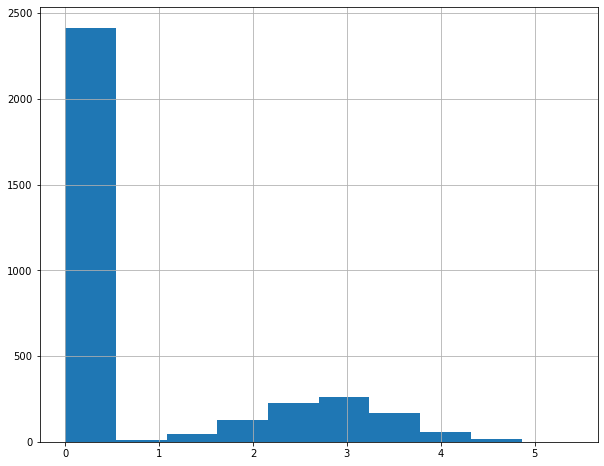

In [17]:
#데이터 사용량에대한 표를 보겠습니다. 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
data.DataAmount.hist(ax=ax)
#plt.hist()

<AxesSubplot:>

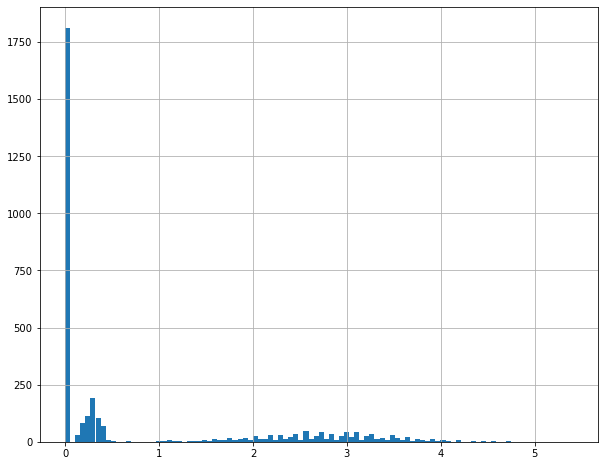

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
data.DataAmount.hist(ax=ax, bins=100)

<AxesSubplot:xlabel='DataAmount', ylabel='Count'>

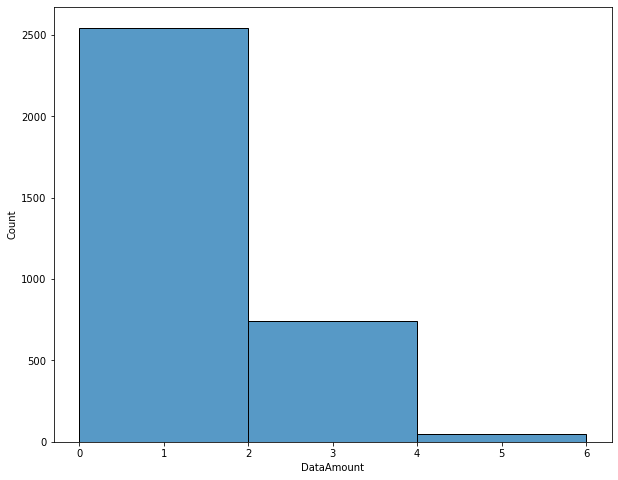

In [23]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.histplot(data.DataAmount, ax=ax, binwidth=2)

In [53]:
#요금에 대해 어떤 컬럼이 가장 큰 요인을 미치는지 알아보겠습니다.
data[['DataAmount','CalMins','CalCounts','RoamingMin','MonthlyFee']].sort_values('MonthlyFee',ascending=False).head(10)

,DataAmount,CalMins,CalCounts,RoamingMin,MonthlyFee
2122,4.43,268.8,78,16.4,111.3
115,5.40,196.8,89,20.0,110.0
670,4.40,266.7,109,16.3,110.0
1355,3.67,302.7,93,13.6,108.7
1821,4.16,270.4,99,15.4,108.6
575,3.83,309.9,90,14.2,108.3
2793,3.89,283.4,104,14.4,106.9
579,4.46,186.7,108,16.5,105.6
2764,4.02,245.0,88,14.9,105.2
2687,4.59,260.8,81,17.0,104.9


In [ ]:
#확인결과 dataamount의 사용량과 로밍시간이 monthllyfee(요금)에 가장 큰 요인을 미치는것으로 확인되어집니다.

In [55]:
#다음으로는 전화사용량에대한 표를 보겠습니다.
data.CalCounts

0       110
1       123
2       114
3        71
4       113
       ... 
3328     77
3329     57
3330    109
3331    105
3332    113
Name: CalCounts, Length: 3333, dtype: int64

In [56]:
data.CalCounts.describe()

count    3333.000000
mean      100.435644
std        20.069084
min         0.000000
25%        87.000000
50%       101.000000
75%       114.000000
max       165.000000
Name: CalCounts, dtype: float64

<AxesSubplot:>

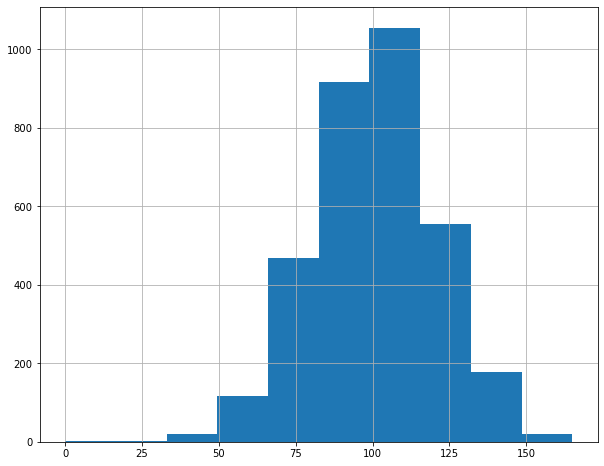

In [57]:
#전화 사용량에대한 표를 보겠습니다. 
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 8))
data.CalCounts.hist(ax=ax)
#plt.hist()

<AxesSubplot:>

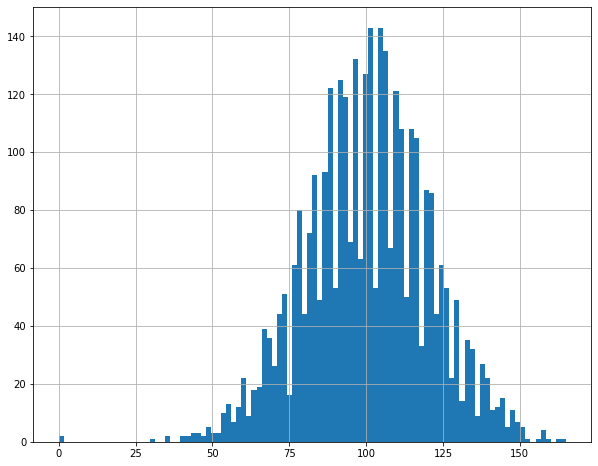

In [58]:
fig, ax = plt.subplots(figsize=(10, 8))
data.CalCounts.hist(ax=ax, bins=100)

In [ ]:
# 이상으로 마치겠습니다 .
#감사합니다 교수님 